In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [30]:
df = pd.read_csv('diabetes.csv')

print("Dataset Info:")
print(df.head())
print("\nBasic Stats:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Basic Stats:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807  

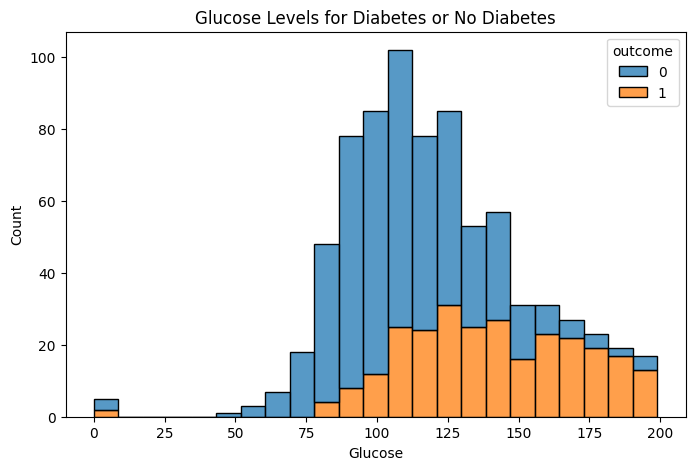

In [31]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Glucose", hue="outcome", multiple="stack")
plt.title("Glucose Levels for Diabetes or No Diabetes")
plt.show()

In [32]:
columns_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_to_fix:
    df[column] = df[column].replace(0, df[column].median())

print("\nCheck for Zeros:")
print((df[columns_to_fix] == 0).sum())


Check for Zeros:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [33]:
X = df.drop('outcome', axis=1)
y = df['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:")
print(f"Accuracy: {accuracy:.2f}")


Model Accuracy:
Accuracy: 0.75



Feature Importance:
                    feature  importance
1                   Glucose    0.264943
5                       BMI    0.163291
7                       Age    0.141010
6  DiabetesPedigreeFunction    0.122428
2             BloodPressure    0.089150
4                   Insulin    0.077839
0               Pregnancies    0.074988
3             SkinThickness    0.066351


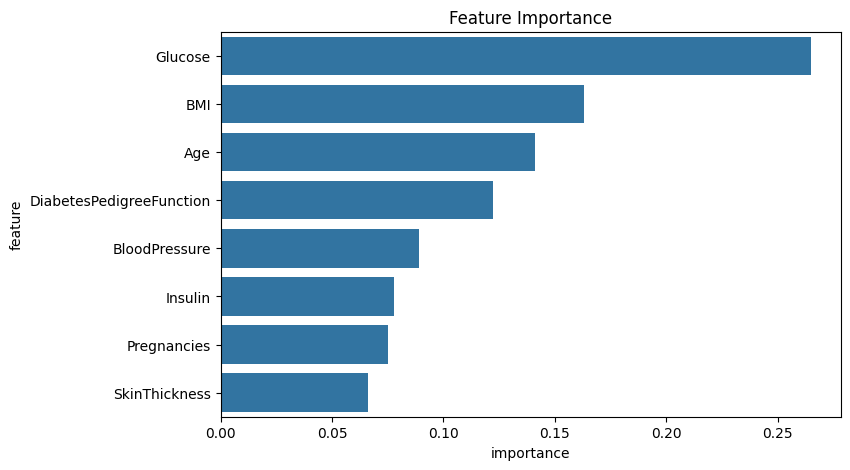

In [36]:




importances = model.feature_importances_
feature_names = X.columns
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importances})
print("\nFeature Importance:")
print(feature_importance.sort_values('importance', ascending=False))

plt.figure(figsize=(8, 5))
sns.barplot(data=feature_importance.sort_values('importance', ascending=False), x='importance', y='feature')
plt.title("Feature Importance")
plt.show()